In [443]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans

In [444]:
df_wine = pd.read_csv("Wine.csv")
df_wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [445]:
df_wine = df_wine.drop("Customer_Segment", axis = 1)

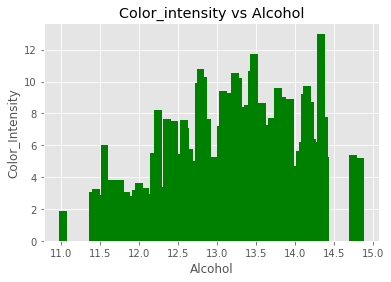

In [446]:
X = list(df_wine.Alcohol)
Y = list(df_wine.Color_Intensity)
  
plt.bar(X, Y, color='g', width=0.1)
plt.title("Color_intensity vs Alcohol")
plt.xlabel("Alcohol")
plt.ylabel("Color_Intensity")  
plt.show()

En este grafico se muestra como varia la intensidad del color del vino segun el alcohol que contenga. Como muestra el grafico la intesidad del color tiende a aumentar mientras mas alcohol tenga el vino.

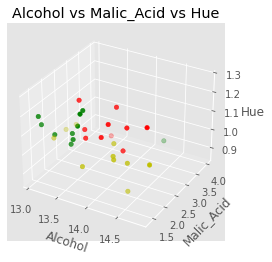

In [447]:
from mpl_toolkits.mplot3d import Axes3D
 
x, y, z = df_wine.Alcohol, df_wine.Malic_Acid, df_wine.Hue
ax = plt.subplot (111, projection='3d')  

ax.scatter(x [: 10], y [: 10], z [: 10], c='y') 
ax.scatter(x[10:20], y[10:20], z[10:20], c='r')
ax.scatter(x[30:40], y[30:40], z[30:40], c='g')
 
ax.set_zlabel('Hue') 
ax.set_ylabel('Malic_Acid')
ax.set_xlabel('Alcohol')
ax.set_title('Alcohol vs Malic_Acid vs Hue')
plt.show()

En este grafico se muestra como varia el color y la acidez del vino segun el alcohol que contenga. Como muestra el grafico la acidez y el color del vino se mantiene dentro de margenes por lo que sus puntos mas bajos se encuentran en los extremos del alcohol.

Text(0.5, 1.0, 'Heatmap Wine')

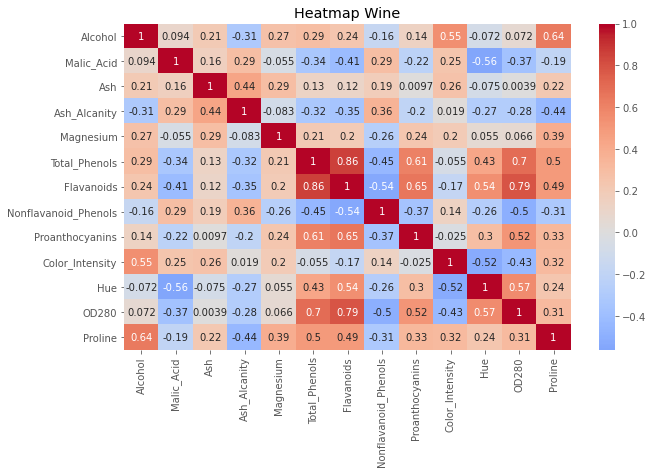

In [448]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df_wine.corr(), center=0, cmap='coolwarm', annot=True)
ax.set_title('Heatmap Wine')

En este mapa de calor de correlacion, se puede visualizar que aquellos que tienen mayor correlacion los fenoles totales con los flanavoides, Y los que menor correlacion tienen es el acido malico con el color del vino.

In [449]:
df_wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [450]:
df_wine.shape

(178, 13)

In [451]:
df_wine.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

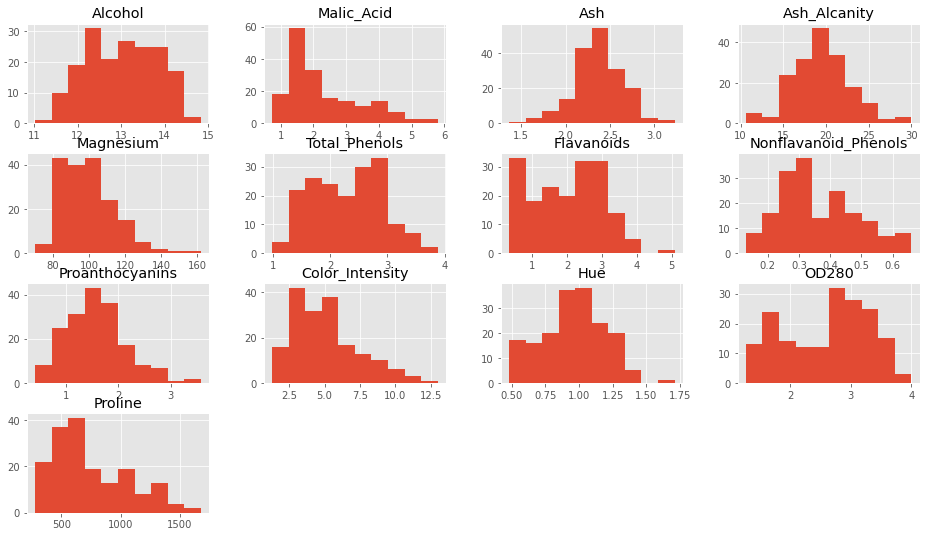

In [452]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
df_wine.hist()
plt.show()

# Normalizacion

In [453]:
df_wine_norm = (df_wine-df_wine.min())/(df_wine.max()-df_wine.min())
df_wine_norm

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [454]:
df_wine_norm.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [455]:
df_wine_norm.value_counts("Ash_Alcanity", sort = False, ascending = True)

Ash_Alcanity
0.000000    1
0.030928    1
0.041237    1
0.072165    1
0.092784    1
           ..
0.793814    1
0.819588    1
0.845361    1
0.922680    2
1.000000    1
Length: 63, dtype: int64

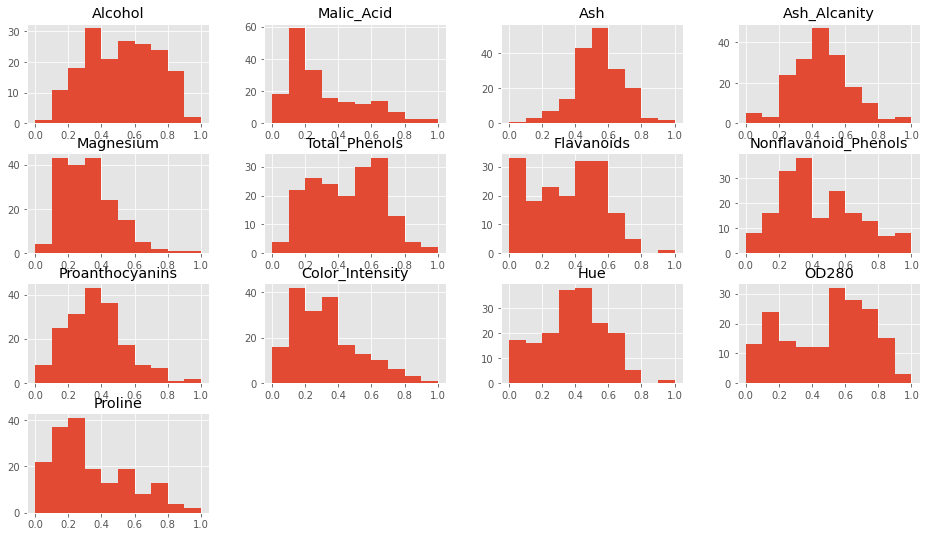

In [456]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
df_wine_norm.hist()
plt.show()

# Clusters

In [457]:
distorsion = []
K = range(1,11)
for k in K:
    modelo = KMeans(n_clusters=k)
    modelo.fit(df_wine)
    distorsion.append(modelo.inertia_)

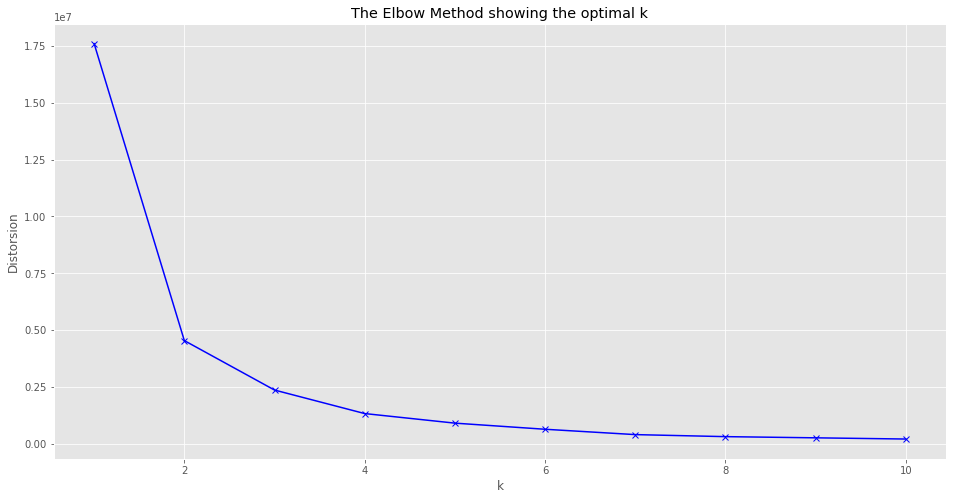

In [458]:
plt.figure(figsize=(16,8))
plt.plot(K, distorsion, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [459]:
clustering = KMeans(n_clusters = 3, max_iter = 300)
clustering.fit(df_wine_norm)

KMeans(n_clusters=3)

In [460]:
df_wine['KMeans_Clusters'] = clustering.labels_ 
df_wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,KMeans_Clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [461]:
#Extraccion de 2 componentes principales para poder realizar un grafico 2D

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_wine = pca.fit_transform(df_wine_norm)
pca_df_wine = pd.DataFrame(data = pca_wine, columns = ['Ash_Alcanity', 'Magnesium'])
pca_names_wine = pd.concat([pca_df_wine, df_wine[['KMeans_Clusters']]],axis = 1)

pca_names_wine

,Ash_Alcanity,Magnesium,KMeans_Clusters
0,-0.706336,-0.253193,1
1,-0.484977,-0.008823,1
2,-0.521172,-0.189187,1
3,-0.821644,-0.580906,1
4,-0.202546,-0.059467,1
...,...,...,...
173,0.739510,-0.471901,2
174,0.581781,-0.348366,2
175,0.626313,-0.546857,2
176,0.572991,-0.425516,2


In [462]:
kmeans = KMeans(n_clusters=3).fit(pca_names_wine.drop(columns="KMeans_Clusters", axis=1))
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.59750634 -0.21895939]
 [ 0.01701227  0.36612572]
 [-0.48503975 -0.17742871]]


In [463]:
pca_names_wine.describe()

,Ash_Alcanity,Magnesium,KMeans_Clusters
count,1.780000e+02,1.780000e+02,178.000000
mean,-1.266153e-16,-6.923301e-17,0.949438
std,4.691398e-01,3.200950e-01,0.811447
min,-8.357170e-01,-6.453058e-01,0.000000
25%,-4.415270e-01,-2.539278e-01,0.000000
50%,-5.710325e-02,-4.904096e-02,1.000000
75%,4.662440e-01,2.823074e-01,2.000000
max,9.152164e-01,7.775431e-01,2.000000


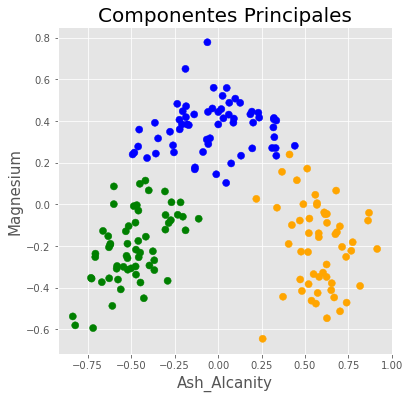

In [464]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Ash_Alcanity', fontsize = 15)
ax.set_ylabel('Magnesium', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)

color_theme = np.array(["blue", "green", "orange"])
ax.scatter(x = pca_names_wine.Ash_Alcanity, y = pca_names_wine.Magnesium, 
          c=color_theme[pca_names_wine.KMeans_Clusters], s = 50)
plt.show()

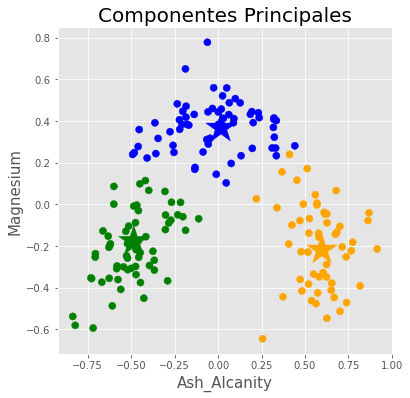

In [465]:
C = kmeans.cluster_centers_
colores=['orange', 'blue', 'green'] 

fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Ash_Alcanity', fontsize = 15)
ax.set_ylabel('Magnesium', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)

color_theme = np.array(["blue", "green", "orange"])
ax.scatter(x = pca_names_wine.Ash_Alcanity, y = pca_names_wine.Magnesium, 
          c=color_theme[pca_names_wine.KMeans_Clusters], s = 50)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()




La extraccion de los componentes principales arroja que el magnesio y las cenizas alcalinas son los 2 principales componentes para agruparlos, el grafico del codo dio como resultado 3 clusters. 